## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import energyefficiencyDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              1006.
Date:                Sun, 24 Jul 2022   Prob (F-statistic):                        0.00
Time:                        15:51:47   Log-Likelihood:                         -99.430
No. Observations:                 614   AIC:                                      212.9
Df Residuals:                     607   BIC:                                      243.8
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

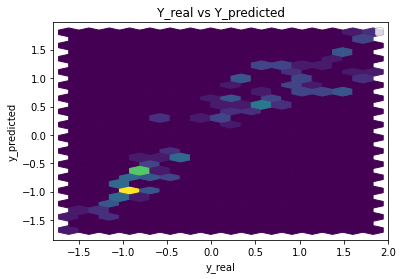

Performance Metrics
Mean Squared Error: 0.09667289394352611
Mean Absolute Error: 0.2136780907897748
Manhattan distance: 32.90642598162531
Euclidean distance: 3.8584486088715786


Stats Model MAE 0.2136780907897748


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.037906
0:	learn: 0.9800554	total: 50.5ms	remaining: 50.4s
1:	learn: 0.9473619	total: 51.3ms	remaining: 25.6s
2:	learn: 0.9159865	total: 52.4ms	remaining: 17.4s
3:	learn: 0.8849929	total: 53.4ms	remaining: 13.3s
4:	learn: 0.8596565	total: 54.5ms	remaining: 10.8s
5:	learn: 0.8315002	total: 63.5ms	remaining: 10.5s
6:	learn: 0.8085162	total: 63.7ms	remaining: 9.04s
7:	learn: 0.7850755	total: 64.2ms	remaining: 7.97s
8:	learn: 0.7592551	total: 76.1ms	remaining: 8.38s
9:	learn: 0.7354062	total: 84.9ms	remaining: 8.4s
10:	learn: 0.7128197	total: 85.6ms	remaining: 7.69s
11:	learn: 0.6895769	total: 85.8ms	remaining: 7.06s
12:	learn: 0.6704933	total: 87.5ms	remaining: 6.64s
13:	learn: 0.6513760	total: 88.7ms	remaining: 6.24s
14:	learn: 0.6308299	total: 89.4ms	remaining: 5.87s
15:	learn: 0.6121607	total: 90.5ms	remaining: 5.56s
16:	learn: 0.5927849	total: 90.9ms	remaining: 5.25s
17:	learn: 0.5754992	total: 94.1ms	remaining: 5.13s
18:	learn: 0.5587448	total: 94.8ms	remaining:

28:	learn: 0.4141908	total: 102ms	remaining: 3.41s
29:	learn: 0.4031100	total: 103ms	remaining: 3.32s
30:	learn: 0.3929790	total: 103ms	remaining: 3.22s
31:	learn: 0.3814736	total: 104ms	remaining: 3.13s
32:	learn: 0.3715216	total: 105ms	remaining: 3.07s
33:	learn: 0.3608053	total: 105ms	remaining: 2.99s
34:	learn: 0.3509580	total: 106ms	remaining: 2.92s
35:	learn: 0.3410313	total: 106ms	remaining: 2.85s
36:	learn: 0.3313697	total: 107ms	remaining: 2.79s
37:	learn: 0.3221405	total: 108ms	remaining: 2.73s
38:	learn: 0.3137108	total: 108ms	remaining: 2.67s
39:	learn: 0.3065512	total: 109ms	remaining: 2.61s
40:	learn: 0.2982430	total: 109ms	remaining: 2.55s
41:	learn: 0.2900388	total: 110ms	remaining: 2.51s
42:	learn: 0.2817413	total: 110ms	remaining: 2.46s
43:	learn: 0.2740982	total: 111ms	remaining: 2.41s
44:	learn: 0.2661092	total: 111ms	remaining: 2.37s
45:	learn: 0.2585804	total: 112ms	remaining: 2.32s
46:	learn: 0.2533268	total: 112ms	remaining: 2.28s
47:	learn: 0.2483646	total: 113

77:	learn: 0.1232228	total: 129ms	remaining: 1.52s
78:	learn: 0.1203317	total: 130ms	remaining: 1.52s
79:	learn: 0.1173389	total: 131ms	remaining: 1.5s
80:	learn: 0.1148928	total: 132ms	remaining: 1.49s
81:	learn: 0.1130778	total: 132ms	remaining: 1.48s
82:	learn: 0.1109328	total: 133ms	remaining: 1.46s
83:	learn: 0.1089915	total: 133ms	remaining: 1.45s
84:	learn: 0.1067189	total: 134ms	remaining: 1.44s
85:	learn: 0.1043087	total: 134ms	remaining: 1.42s
86:	learn: 0.1030474	total: 135ms	remaining: 1.41s
87:	learn: 0.1008677	total: 135ms	remaining: 1.4s
88:	learn: 0.0996286	total: 136ms	remaining: 1.39s
89:	learn: 0.0976882	total: 136ms	remaining: 1.38s
90:	learn: 0.0964872	total: 137ms	remaining: 1.36s
91:	learn: 0.0945446	total: 137ms	remaining: 1.35s
92:	learn: 0.0927154	total: 137ms	remaining: 1.34s
93:	learn: 0.0915423	total: 138ms	remaining: 1.33s
94:	learn: 0.0908835	total: 138ms	remaining: 1.32s
95:	learn: 0.0892782	total: 139ms	remaining: 1.3s
96:	learn: 0.0874211	total: 139ms	

149:	learn: 0.0510822	total: 169ms	remaining: 957ms
150:	learn: 0.0508690	total: 171ms	remaining: 963ms
151:	learn: 0.0506613	total: 172ms	remaining: 958ms
152:	learn: 0.0503904	total: 172ms	remaining: 952ms
153:	learn: 0.0500937	total: 172ms	remaining: 946ms
154:	learn: 0.0498908	total: 172ms	remaining: 940ms
155:	learn: 0.0496295	total: 173ms	remaining: 935ms
156:	learn: 0.0493773	total: 174ms	remaining: 933ms
157:	learn: 0.0491489	total: 174ms	remaining: 928ms
158:	learn: 0.0488820	total: 175ms	remaining: 924ms
159:	learn: 0.0486785	total: 175ms	remaining: 921ms
160:	learn: 0.0484048	total: 176ms	remaining: 915ms
161:	learn: 0.0481823	total: 176ms	remaining: 911ms
162:	learn: 0.0479796	total: 177ms	remaining: 907ms
163:	learn: 0.0478777	total: 177ms	remaining: 901ms
164:	learn: 0.0475872	total: 177ms	remaining: 898ms
165:	learn: 0.0475603	total: 178ms	remaining: 892ms
166:	learn: 0.0473761	total: 181ms	remaining: 901ms
167:	learn: 0.0471055	total: 182ms	remaining: 902ms
168:	learn: 

324:	learn: 0.0299100	total: 257ms	remaining: 533ms
325:	learn: 0.0298168	total: 257ms	remaining: 532ms
326:	learn: 0.0297612	total: 259ms	remaining: 532ms
327:	learn: 0.0297012	total: 259ms	remaining: 531ms
328:	learn: 0.0296189	total: 260ms	remaining: 530ms
329:	learn: 0.0295743	total: 260ms	remaining: 528ms
330:	learn: 0.0295275	total: 260ms	remaining: 526ms
331:	learn: 0.0294476	total: 261ms	remaining: 525ms
332:	learn: 0.0294123	total: 261ms	remaining: 524ms
333:	learn: 0.0293499	total: 262ms	remaining: 522ms
334:	learn: 0.0293255	total: 262ms	remaining: 520ms
335:	learn: 0.0292270	total: 262ms	remaining: 519ms
336:	learn: 0.0291570	total: 263ms	remaining: 518ms
337:	learn: 0.0290815	total: 264ms	remaining: 516ms
338:	learn: 0.0290414	total: 264ms	remaining: 514ms
339:	learn: 0.0289579	total: 264ms	remaining: 513ms
340:	learn: 0.0289304	total: 264ms	remaining: 511ms
341:	learn: 0.0288817	total: 265ms	remaining: 509ms
342:	learn: 0.0288395	total: 266ms	remaining: 509ms
343:	learn: 

360:	learn: 0.0278682	total: 279ms	remaining: 494ms
361:	learn: 0.0278126	total: 280ms	remaining: 494ms
362:	learn: 0.0277848	total: 281ms	remaining: 493ms
363:	learn: 0.0277426	total: 283ms	remaining: 494ms
364:	learn: 0.0277129	total: 283ms	remaining: 493ms
365:	learn: 0.0276932	total: 284ms	remaining: 491ms
366:	learn: 0.0276403	total: 284ms	remaining: 490ms
367:	learn: 0.0275849	total: 284ms	remaining: 488ms
368:	learn: 0.0275114	total: 284ms	remaining: 486ms
369:	learn: 0.0274639	total: 285ms	remaining: 485ms
370:	learn: 0.0274339	total: 285ms	remaining: 483ms
371:	learn: 0.0274063	total: 285ms	remaining: 482ms
372:	learn: 0.0273520	total: 286ms	remaining: 480ms
373:	learn: 0.0272606	total: 287ms	remaining: 480ms
374:	learn: 0.0272396	total: 288ms	remaining: 480ms
375:	learn: 0.0272119	total: 288ms	remaining: 479ms
376:	learn: 0.0271926	total: 289ms	remaining: 477ms
377:	learn: 0.0271309	total: 289ms	remaining: 476ms
378:	learn: 0.0270681	total: 289ms	remaining: 474ms
379:	learn: 

434:	learn: 0.0246738	total: 314ms	remaining: 408ms
435:	learn: 0.0246263	total: 316ms	remaining: 409ms
436:	learn: 0.0245965	total: 317ms	remaining: 408ms
437:	learn: 0.0245556	total: 317ms	remaining: 407ms
438:	learn: 0.0245360	total: 317ms	remaining: 405ms
439:	learn: 0.0245173	total: 317ms	remaining: 404ms
440:	learn: 0.0244685	total: 318ms	remaining: 403ms
441:	learn: 0.0244372	total: 318ms	remaining: 401ms
442:	learn: 0.0243963	total: 318ms	remaining: 400ms
443:	learn: 0.0243714	total: 319ms	remaining: 399ms
444:	learn: 0.0243332	total: 319ms	remaining: 398ms
445:	learn: 0.0242934	total: 319ms	remaining: 397ms
446:	learn: 0.0242532	total: 320ms	remaining: 395ms
447:	learn: 0.0242131	total: 320ms	remaining: 394ms
448:	learn: 0.0241987	total: 320ms	remaining: 393ms
449:	learn: 0.0241833	total: 321ms	remaining: 392ms
450:	learn: 0.0241641	total: 321ms	remaining: 391ms
451:	learn: 0.0241252	total: 321ms	remaining: 390ms
452:	learn: 0.0241083	total: 322ms	remaining: 388ms
453:	learn: 

568:	learn: 0.0203888	total: 397ms	remaining: 301ms
569:	learn: 0.0203615	total: 397ms	remaining: 300ms
570:	learn: 0.0203216	total: 398ms	remaining: 299ms
571:	learn: 0.0202952	total: 401ms	remaining: 300ms
572:	learn: 0.0202832	total: 402ms	remaining: 299ms
573:	learn: 0.0202420	total: 402ms	remaining: 298ms
574:	learn: 0.0202102	total: 402ms	remaining: 297ms
575:	learn: 0.0201934	total: 403ms	remaining: 297ms
576:	learn: 0.0201637	total: 403ms	remaining: 296ms
577:	learn: 0.0201426	total: 404ms	remaining: 295ms
578:	learn: 0.0201287	total: 404ms	remaining: 294ms
579:	learn: 0.0201034	total: 404ms	remaining: 293ms
580:	learn: 0.0200870	total: 405ms	remaining: 292ms
581:	learn: 0.0200713	total: 405ms	remaining: 291ms
582:	learn: 0.0200348	total: 406ms	remaining: 290ms
583:	learn: 0.0200108	total: 406ms	remaining: 289ms
584:	learn: 0.0199896	total: 406ms	remaining: 288ms
585:	learn: 0.0199639	total: 406ms	remaining: 287ms
586:	learn: 0.0199478	total: 407ms	remaining: 286ms
587:	learn: 

616:	learn: 0.0193129	total: 421ms	remaining: 261ms
617:	learn: 0.0193041	total: 423ms	remaining: 262ms
618:	learn: 0.0192792	total: 424ms	remaining: 261ms
619:	learn: 0.0192584	total: 425ms	remaining: 261ms
620:	learn: 0.0192511	total: 426ms	remaining: 260ms
621:	learn: 0.0192416	total: 426ms	remaining: 259ms
622:	learn: 0.0192067	total: 427ms	remaining: 258ms
623:	learn: 0.0191875	total: 428ms	remaining: 258ms
624:	learn: 0.0191689	total: 429ms	remaining: 258ms
625:	learn: 0.0191482	total: 430ms	remaining: 257ms
626:	learn: 0.0191389	total: 432ms	remaining: 257ms
627:	learn: 0.0191147	total: 434ms	remaining: 257ms
628:	learn: 0.0191051	total: 435ms	remaining: 257ms
629:	learn: 0.0190855	total: 436ms	remaining: 256ms
630:	learn: 0.0190616	total: 437ms	remaining: 256ms
631:	learn: 0.0190256	total: 438ms	remaining: 255ms
632:	learn: 0.0189862	total: 439ms	remaining: 254ms
633:	learn: 0.0189554	total: 440ms	remaining: 254ms
634:	learn: 0.0189257	total: 440ms	remaining: 253ms
635:	learn: 

669:	learn: 0.0183651	total: 458ms	remaining: 226ms
670:	learn: 0.0183361	total: 460ms	remaining: 226ms
671:	learn: 0.0183249	total: 461ms	remaining: 225ms
672:	learn: 0.0183040	total: 461ms	remaining: 224ms
673:	learn: 0.0182932	total: 462ms	remaining: 223ms
674:	learn: 0.0182732	total: 462ms	remaining: 223ms
675:	learn: 0.0182609	total: 464ms	remaining: 222ms
676:	learn: 0.0182303	total: 465ms	remaining: 222ms
677:	learn: 0.0182198	total: 465ms	remaining: 221ms
678:	learn: 0.0182009	total: 466ms	remaining: 220ms
679:	learn: 0.0181938	total: 467ms	remaining: 220ms
680:	learn: 0.0181801	total: 468ms	remaining: 219ms
681:	learn: 0.0181657	total: 470ms	remaining: 219ms
682:	learn: 0.0181462	total: 470ms	remaining: 218ms
683:	learn: 0.0181249	total: 472ms	remaining: 218ms
684:	learn: 0.0181210	total: 472ms	remaining: 217ms
685:	learn: 0.0180982	total: 473ms	remaining: 217ms
686:	learn: 0.0180820	total: 474ms	remaining: 216ms
687:	learn: 0.0180642	total: 474ms	remaining: 215ms
688:	learn: 

826:	learn: 0.0158645	total: 543ms	remaining: 114ms
827:	learn: 0.0158456	total: 544ms	remaining: 113ms
828:	learn: 0.0158270	total: 544ms	remaining: 112ms
829:	learn: 0.0158173	total: 544ms	remaining: 111ms
830:	learn: 0.0158070	total: 547ms	remaining: 111ms
831:	learn: 0.0157895	total: 547ms	remaining: 111ms
832:	learn: 0.0157738	total: 548ms	remaining: 110ms
833:	learn: 0.0157639	total: 548ms	remaining: 109ms
834:	learn: 0.0157491	total: 548ms	remaining: 108ms
835:	learn: 0.0157390	total: 548ms	remaining: 108ms
836:	learn: 0.0157240	total: 549ms	remaining: 107ms
837:	learn: 0.0157101	total: 549ms	remaining: 106ms
838:	learn: 0.0157053	total: 552ms	remaining: 106ms
839:	learn: 0.0156783	total: 552ms	remaining: 105ms
840:	learn: 0.0156736	total: 552ms	remaining: 104ms
841:	learn: 0.0156594	total: 553ms	remaining: 104ms
842:	learn: 0.0156544	total: 553ms	remaining: 103ms
843:	learn: 0.0156402	total: 553ms	remaining: 102ms
844:	learn: 0.0156227	total: 554ms	remaining: 102ms
845:	learn: 

865:	learn: 0.0153115	total: 568ms	remaining: 87.9ms
866:	learn: 0.0152991	total: 569ms	remaining: 87.2ms
867:	learn: 0.0152848	total: 569ms	remaining: 86.5ms
868:	learn: 0.0152780	total: 569ms	remaining: 85.8ms
869:	learn: 0.0152747	total: 571ms	remaining: 85.3ms
870:	learn: 0.0152589	total: 572ms	remaining: 84.7ms
871:	learn: 0.0152404	total: 572ms	remaining: 84ms
872:	learn: 0.0152340	total: 573ms	remaining: 83.3ms
873:	learn: 0.0152288	total: 578ms	remaining: 83.4ms
874:	learn: 0.0152191	total: 579ms	remaining: 82.7ms
875:	learn: 0.0152078	total: 579ms	remaining: 81.9ms
876:	learn: 0.0151912	total: 579ms	remaining: 81.2ms
877:	learn: 0.0151718	total: 579ms	remaining: 80.5ms
878:	learn: 0.0151546	total: 581ms	remaining: 80ms
879:	learn: 0.0151307	total: 582ms	remaining: 79.4ms
880:	learn: 0.0151254	total: 583ms	remaining: 78.7ms
881:	learn: 0.0151016	total: 583ms	remaining: 78ms
882:	learn: 0.0150960	total: 584ms	remaining: 77.4ms
883:	learn: 0.0150775	total: 585ms	remaining: 76.7ms

907:	learn: 0.0148110	total: 600ms	remaining: 60.8ms
908:	learn: 0.0147978	total: 601ms	remaining: 60.2ms
909:	learn: 0.0147848	total: 601ms	remaining: 59.5ms
910:	learn: 0.0147654	total: 602ms	remaining: 58.8ms
911:	learn: 0.0147568	total: 602ms	remaining: 58.1ms
912:	learn: 0.0147390	total: 603ms	remaining: 57.4ms
913:	learn: 0.0147316	total: 603ms	remaining: 56.7ms
914:	learn: 0.0147139	total: 603ms	remaining: 56.1ms
915:	learn: 0.0147094	total: 604ms	remaining: 55.4ms
916:	learn: 0.0147039	total: 605ms	remaining: 54.7ms
917:	learn: 0.0146892	total: 606ms	remaining: 54.1ms
918:	learn: 0.0146800	total: 606ms	remaining: 53.4ms
919:	learn: 0.0146701	total: 607ms	remaining: 52.8ms
920:	learn: 0.0146599	total: 607ms	remaining: 52.1ms
921:	learn: 0.0146373	total: 607ms	remaining: 51.4ms
922:	learn: 0.0146306	total: 608ms	remaining: 50.7ms
923:	learn: 0.0146054	total: 608ms	remaining: 50ms
924:	learn: 0.0145927	total: 608ms	remaining: 49.3ms
925:	learn: 0.0145647	total: 608ms	remaining: 48

Catboost MAE 0.023182069338721936


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 1.01611 | train_mse: 0.76023 | train_mae: 0.72317 |  0:00:02s


epoch 1  | loss: 0.288   | train_mse: 0.37688 | train_mae: 0.4922  |  0:00:02s


epoch 2  | loss: 0.23635 | train_mse: 0.22509 | train_mae: 0.37308 |  0:00:03s


epoch 3  | loss: 0.20065 | train_mse: 0.1712  | train_mae: 0.33203 |  0:00:04s


epoch 4  | loss: 0.1726  | train_mse: 0.12503 | train_mae: 0.27621 |  0:00:05s


epoch 5  | loss: 0.15376 | train_mse: 0.10654 | train_mae: 0.2644  |  0:00:06s


epoch 6  | loss: 0.12974 | train_mse: 0.10081 | train_mae: 0.25936 |  0:00:07s


epoch 7  | loss: 0.11015 | train_mse: 0.09719 | train_mae: 0.25019 |  0:00:07s


epoch 8  | loss: 0.11518 | train_mse: 0.08498 | train_mae: 0.22596 |  0:00:08s


epoch 9  | loss: 0.105   | train_mse: 0.07218 | train_mae: 0.20719 |  0:00:10s


epoch 10 | loss: 0.09467 | train_mse: 0.08267 | train_mae: 0.22692 |  0:00:13s


epoch 11 | loss: 0.1016  | train_mse: 0.07555 | train_mae: 0.20796 |  0:00:15s


epoch 12 | loss: 0.10455 | train_mse: 0.0706  | train_mae: 0.20567 |  0:00:16s


epoch 13 | loss: 0.10799 | train_mse: 0.06203 | train_mae: 0.19647 |  0:00:16s


epoch 14 | loss: 0.08332 | train_mse: 0.04516 | train_mae: 0.16134 |  0:00:17s


epoch 15 | loss: 0.08876 | train_mse: 0.07033 | train_mae: 0.20374 |  0:00:18s


epoch 16 | loss: 0.09771 | train_mse: 0.05679 | train_mae: 0.17519 |  0:00:19s


epoch 17 | loss: 0.09574 | train_mse: 0.05335 | train_mae: 0.18279 |  0:00:20s


epoch 18 | loss: 0.09952 | train_mse: 0.0369  | train_mae: 0.15402 |  0:00:22s


epoch 19 | loss: 0.07341 | train_mse: 0.04178 | train_mae: 0.16341 |  0:00:23s


epoch 20 | loss: 0.07804 | train_mse: 0.03873 | train_mae: 0.15928 |  0:00:24s


epoch 21 | loss: 0.07191 | train_mse: 0.04977 | train_mae: 0.18494 |  0:00:25s


epoch 22 | loss: 0.06166 | train_mse: 0.04091 | train_mae: 0.1598  |  0:00:26s


epoch 23 | loss: 0.06791 | train_mse: 0.04169 | train_mae: 0.15883 |  0:00:26s


epoch 24 | loss: 0.05665 | train_mse: 0.03165 | train_mae: 0.14327 |  0:00:27s


epoch 25 | loss: 0.07916 | train_mse: 0.04142 | train_mae: 0.16653 |  0:00:27s


epoch 26 | loss: 0.06712 | train_mse: 0.03101 | train_mae: 0.13931 |  0:00:28s


epoch 27 | loss: 0.06995 | train_mse: 0.02618 | train_mae: 0.12691 |  0:00:29s


epoch 28 | loss: 0.05888 | train_mse: 0.02962 | train_mae: 0.14266 |  0:00:29s


epoch 29 | loss: 0.05816 | train_mse: 0.02261 | train_mae: 0.12222 |  0:00:30s


epoch 30 | loss: 0.0758  | train_mse: 0.02395 | train_mae: 0.12721 |  0:00:31s


epoch 31 | loss: 0.06906 | train_mse: 0.05567 | train_mae: 0.17923 |  0:00:31s


epoch 32 | loss: 0.07749 | train_mse: 0.03311 | train_mae: 0.14235 |  0:00:32s


epoch 33 | loss: 0.05839 | train_mse: 0.02508 | train_mae: 0.123   |  0:00:32s


epoch 34 | loss: 0.04405 | train_mse: 0.02987 | train_mae: 0.14489 |  0:00:33s


epoch 35 | loss: 0.05103 | train_mse: 0.02991 | train_mae: 0.14091 |  0:00:34s


epoch 36 | loss: 0.06487 | train_mse: 0.03088 | train_mae: 0.14446 |  0:00:34s


epoch 37 | loss: 0.06167 | train_mse: 0.02366 | train_mae: 0.12243 |  0:00:35s


epoch 38 | loss: 0.04787 | train_mse: 0.03069 | train_mae: 0.13903 |  0:00:35s


epoch 39 | loss: 0.04876 | train_mse: 0.02253 | train_mae: 0.12273 |  0:00:36s


epoch 40 | loss: 0.05043 | train_mse: 0.0208  | train_mae: 0.11094 |  0:00:37s


epoch 41 | loss: 0.05102 | train_mse: 0.03307 | train_mae: 0.13699 |  0:00:37s


epoch 42 | loss: 0.04954 | train_mse: 0.03126 | train_mae: 0.13718 |  0:00:38s


epoch 43 | loss: 0.05572 | train_mse: 0.02501 | train_mae: 0.12316 |  0:00:38s


epoch 44 | loss: 0.05053 | train_mse: 0.03858 | train_mae: 0.15344 |  0:00:39s


epoch 45 | loss: 0.06143 | train_mse: 0.03809 | train_mae: 0.14474 |  0:00:39s


epoch 46 | loss: 0.06545 | train_mse: 0.01991 | train_mae: 0.10999 |  0:00:40s


epoch 47 | loss: 0.03876 | train_mse: 0.01888 | train_mae: 0.10586 |  0:00:41s


epoch 48 | loss: 0.047   | train_mse: 0.02305 | train_mae: 0.11914 |  0:00:41s


epoch 49 | loss: 0.06891 | train_mse: 0.0281  | train_mae: 0.13708 |  0:00:42s


epoch 50 | loss: 0.04726 | train_mse: 0.02865 | train_mae: 0.12923 |  0:00:43s


epoch 51 | loss: 0.04068 | train_mse: 0.01921 | train_mae: 0.10983 |  0:00:43s


epoch 52 | loss: 0.04558 | train_mse: 0.02316 | train_mae: 0.11678 |  0:00:44s


epoch 53 | loss: 0.0439  | train_mse: 0.02591 | train_mae: 0.13274 |  0:00:47s


epoch 54 | loss: 0.03895 | train_mse: 0.01861 | train_mae: 0.11025 |  0:00:48s


epoch 55 | loss: 0.03541 | train_mse: 0.01873 | train_mae: 0.11285 |  0:00:49s


epoch 56 | loss: 0.04189 | train_mse: 0.0175  | train_mae: 0.10919 |  0:00:51s


epoch 57 | loss: 0.04673 | train_mse: 0.01998 | train_mae: 0.11351 |  0:00:53s


epoch 58 | loss: 0.03878 | train_mse: 0.01769 | train_mae: 0.10858 |  0:00:55s


epoch 59 | loss: 0.05865 | train_mse: 0.03048 | train_mae: 0.14048 |  0:00:58s


epoch 60 | loss: 0.04445 | train_mse: 0.02093 | train_mae: 0.11524 |  0:01:03s


epoch 61 | loss: 0.04071 | train_mse: 0.01624 | train_mae: 0.09676 |  0:01:07s


epoch 62 | loss: 0.05091 | train_mse: 0.01995 | train_mae: 0.11259 |  0:01:10s


epoch 63 | loss: 0.05247 | train_mse: 0.02487 | train_mae: 0.1275  |  0:01:14s


epoch 64 | loss: 0.04861 | train_mse: 0.01806 | train_mae: 0.10963 |  0:01:16s


epoch 65 | loss: 0.03639 | train_mse: 0.02481 | train_mae: 0.12745 |  0:01:21s


epoch 66 | loss: 0.04592 | train_mse: 0.02122 | train_mae: 0.11866 |  0:01:25s


epoch 67 | loss: 0.04004 | train_mse: 0.01477 | train_mae: 0.09437 |  0:01:28s


epoch 68 | loss: 0.04473 | train_mse: 0.02068 | train_mae: 0.12097 |  0:01:29s


epoch 69 | loss: 0.03746 | train_mse: 0.02398 | train_mae: 0.12589 |  0:01:30s


epoch 70 | loss: 0.03238 | train_mse: 0.01458 | train_mae: 0.09946 |  0:01:31s


epoch 71 | loss: 0.03757 | train_mse: 0.01535 | train_mae: 0.104   |  0:01:32s


epoch 72 | loss: 0.03898 | train_mse: 0.01336 | train_mae: 0.09426 |  0:01:33s


epoch 73 | loss: 0.02488 | train_mse: 0.01209 | train_mae: 0.09318 |  0:01:35s


epoch 74 | loss: 0.02647 | train_mse: 0.01302 | train_mae: 0.09149 |  0:01:36s


epoch 75 | loss: 0.03332 | train_mse: 0.01182 | train_mae: 0.08792 |  0:01:36s


epoch 76 | loss: 0.04686 | train_mse: 0.01136 | train_mae: 0.08794 |  0:01:37s


epoch 77 | loss: 0.03218 | train_mse: 0.01461 | train_mae: 0.0932  |  0:01:38s


epoch 78 | loss: 0.03049 | train_mse: 0.01908 | train_mae: 0.11247 |  0:01:39s


epoch 79 | loss: 0.02898 | train_mse: 0.01406 | train_mae: 0.08769 |  0:01:39s


epoch 80 | loss: 0.02516 | train_mse: 0.00977 | train_mae: 0.07663 |  0:01:40s


epoch 81 | loss: 0.02557 | train_mse: 0.00867 | train_mae: 0.07297 |  0:01:41s


epoch 82 | loss: 0.02628 | train_mse: 0.01062 | train_mae: 0.08259 |  0:01:41s


epoch 83 | loss: 0.04426 | train_mse: 0.01802 | train_mae: 0.10643 |  0:01:42s


epoch 84 | loss: 0.03589 | train_mse: 0.02964 | train_mae: 0.14171 |  0:01:43s


epoch 85 | loss: 0.04044 | train_mse: 0.01342 | train_mae: 0.08661 |  0:01:43s


epoch 86 | loss: 0.02928 | train_mse: 0.01186 | train_mae: 0.0837  |  0:01:44s


epoch 87 | loss: 0.03135 | train_mse: 0.03007 | train_mae: 0.13689 |  0:01:45s


epoch 88 | loss: 0.03435 | train_mse: 0.0206  | train_mae: 0.11307 |  0:01:45s


epoch 89 | loss: 0.02651 | train_mse: 0.01452 | train_mae: 0.09184 |  0:01:46s


epoch 90 | loss: 0.02825 | train_mse: 0.01334 | train_mae: 0.08918 |  0:01:47s


epoch 91 | loss: 0.02649 | train_mse: 0.01139 | train_mae: 0.08221 |  0:01:48s


epoch 92 | loss: 0.02267 | train_mse: 0.00967 | train_mae: 0.07489 |  0:01:49s


epoch 93 | loss: 0.03202 | train_mse: 0.01211 | train_mae: 0.08564 |  0:01:50s


epoch 94 | loss: 0.04721 | train_mse: 0.03009 | train_mae: 0.14569 |  0:01:51s


epoch 95 | loss: 0.03461 | train_mse: 0.01308 | train_mae: 0.08859 |  0:01:52s


epoch 96 | loss: 0.0315  | train_mse: 0.01578 | train_mae: 0.091   |  0:01:53s


epoch 97 | loss: 0.03758 | train_mse: 0.01492 | train_mae: 0.09498 |  0:01:54s


epoch 98 | loss: 0.02784 | train_mse: 0.0163  | train_mae: 0.09955 |  0:01:55s


epoch 99 | loss: 0.03407 | train_mse: 0.01266 | train_mae: 0.08853 |  0:01:56s


epoch 100| loss: 0.04018 | train_mse: 0.02705 | train_mae: 0.12126 |  0:01:57s


epoch 101| loss: 0.03648 | train_mse: 0.01189 | train_mae: 0.08146 |  0:01:59s


epoch 102| loss: 0.03294 | train_mse: 0.01987 | train_mae: 0.10859 |  0:02:02s


epoch 103| loss: 0.03228 | train_mse: 0.01261 | train_mae: 0.08402 |  0:02:03s


epoch 104| loss: 0.04102 | train_mse: 0.02034 | train_mae: 0.10901 |  0:02:04s


epoch 105| loss: 0.04291 | train_mse: 0.01991 | train_mae: 0.11313 |  0:02:05s


epoch 106| loss: 0.04149 | train_mse: 0.01542 | train_mae: 0.09577 |  0:02:06s


epoch 107| loss: 0.03432 | train_mse: 0.02512 | train_mae: 0.11759 |  0:02:07s


epoch 108| loss: 0.02686 | train_mse: 0.00698 | train_mae: 0.06507 |  0:02:08s


epoch 109| loss: 0.02521 | train_mse: 0.00983 | train_mae: 0.0766  |  0:02:09s


epoch 110| loss: 0.02694 | train_mse: 0.01319 | train_mae: 0.0892  |  0:02:10s


epoch 111| loss: 0.03573 | train_mse: 0.01238 | train_mae: 0.0891  |  0:02:12s


epoch 112| loss: 0.02931 | train_mse: 0.02633 | train_mae: 0.1366  |  0:02:13s


epoch 113| loss: 0.04399 | train_mse: 0.02349 | train_mae: 0.11379 |  0:02:14s


epoch 114| loss: 0.03988 | train_mse: 0.01142 | train_mae: 0.08501 |  0:02:15s


epoch 115| loss: 0.02943 | train_mse: 0.01713 | train_mae: 0.10336 |  0:02:15s


epoch 116| loss: 0.03016 | train_mse: 0.01231 | train_mae: 0.08412 |  0:02:16s


epoch 117| loss: 0.0304  | train_mse: 0.01151 | train_mae: 0.08239 |  0:02:16s


epoch 118| loss: 0.03874 | train_mse: 0.00954 | train_mae: 0.07293 |  0:02:17s


epoch 119| loss: 0.026   | train_mse: 0.016   | train_mae: 0.09834 |  0:02:18s


epoch 120| loss: 0.03217 | train_mse: 0.01166 | train_mae: 0.08043 |  0:02:18s


epoch 121| loss: 0.02844 | train_mse: 0.00956 | train_mae: 0.07664 |  0:02:19s


epoch 122| loss: 0.02734 | train_mse: 0.01391 | train_mae: 0.08894 |  0:02:19s


epoch 123| loss: 0.03574 | train_mse: 0.01172 | train_mae: 0.08501 |  0:02:20s


epoch 124| loss: 0.03499 | train_mse: 0.02127 | train_mae: 0.1197  |  0:02:21s


epoch 125| loss: 0.03017 | train_mse: 0.01147 | train_mae: 0.08126 |  0:02:22s


epoch 126| loss: 0.02562 | train_mse: 0.01426 | train_mae: 0.09072 |  0:02:23s


epoch 127| loss: 0.02575 | train_mse: 0.0122  | train_mae: 0.08613 |  0:02:24s


epoch 128| loss: 0.02732 | train_mse: 0.01041 | train_mae: 0.07522 |  0:02:25s


epoch 129| loss: 0.0204  | train_mse: 0.01153 | train_mae: 0.08161 |  0:02:25s


epoch 130| loss: 0.0259  | train_mse: 0.02013 | train_mae: 0.10802 |  0:02:26s


epoch 131| loss: 0.02323 | train_mse: 0.00895 | train_mae: 0.07008 |  0:02:27s


epoch 132| loss: 0.02995 | train_mse: 0.00993 | train_mae: 0.08097 |  0:02:27s


epoch 133| loss: 0.0237  | train_mse: 0.01065 | train_mae: 0.08135 |  0:02:28s


epoch 134| loss: 0.03107 | train_mse: 0.01271 | train_mae: 0.08855 |  0:02:28s


epoch 135| loss: 0.03053 | train_mse: 0.01356 | train_mae: 0.08956 |  0:02:29s


epoch 136| loss: 0.03238 | train_mse: 0.01316 | train_mae: 0.09184 |  0:02:30s


epoch 137| loss: 0.02647 | train_mse: 0.01076 | train_mae: 0.08262 |  0:02:32s


epoch 138| loss: 0.0346  | train_mse: 0.01189 | train_mae: 0.08828 |  0:02:35s


epoch 139| loss: 0.03391 | train_mse: 0.01055 | train_mae: 0.07905 |  0:02:36s


epoch 140| loss: 0.0258  | train_mse: 0.01145 | train_mae: 0.08438 |  0:02:37s


epoch 141| loss: 0.03207 | train_mse: 0.01132 | train_mae: 0.08606 |  0:02:39s


epoch 142| loss: 0.02487 | train_mse: 0.01045 | train_mae: 0.07437 |  0:02:42s


epoch 143| loss: 0.01951 | train_mse: 0.00672 | train_mae: 0.06373 |  0:02:42s


epoch 144| loss: 0.0279  | train_mse: 0.00893 | train_mae: 0.07573 |  0:02:43s


epoch 145| loss: 0.02057 | train_mse: 0.0068  | train_mae: 0.06332 |  0:02:44s


epoch 146| loss: 0.02626 | train_mse: 0.01013 | train_mae: 0.0719  |  0:02:44s


epoch 147| loss: 0.02388 | train_mse: 0.00689 | train_mae: 0.06419 |  0:02:46s


epoch 148| loss: 0.02045 | train_mse: 0.01229 | train_mae: 0.07978 |  0:02:47s


epoch 149| loss: 0.02539 | train_mse: 0.00973 | train_mae: 0.07402 |  0:02:47s


epoch 150| loss: 0.03146 | train_mse: 0.02381 | train_mae: 0.113   |  0:02:48s


epoch 151| loss: 0.02703 | train_mse: 0.01075 | train_mae: 0.07943 |  0:02:49s


epoch 152| loss: 0.02283 | train_mse: 0.00731 | train_mae: 0.06473 |  0:02:49s


epoch 153| loss: 0.0279  | train_mse: 0.00925 | train_mae: 0.07558 |  0:02:50s


epoch 154| loss: 0.02658 | train_mse: 0.01184 | train_mae: 0.083   |  0:02:51s


epoch 155| loss: 0.02477 | train_mse: 0.01113 | train_mae: 0.08239 |  0:02:52s


epoch 156| loss: 0.02319 | train_mse: 0.00807 | train_mae: 0.06923 |  0:02:52s


epoch 157| loss: 0.01997 | train_mse: 0.02024 | train_mae: 0.11143 |  0:02:53s


epoch 158| loss: 0.02525 | train_mse: 0.01022 | train_mae: 0.07728 |  0:02:54s


epoch 159| loss: 0.0313  | train_mse: 0.00988 | train_mae: 0.07415 |  0:02:54s


epoch 160| loss: 0.02578 | train_mse: 0.01195 | train_mae: 0.0873  |  0:02:55s


epoch 161| loss: 0.01865 | train_mse: 0.01571 | train_mae: 0.09587 |  0:02:55s


epoch 162| loss: 0.02462 | train_mse: 0.01315 | train_mae: 0.09276 |  0:02:56s


epoch 163| loss: 0.02369 | train_mse: 0.01118 | train_mae: 0.08135 |  0:02:57s


epoch 164| loss: 0.01935 | train_mse: 0.00879 | train_mae: 0.07376 |  0:02:58s


epoch 165| loss: 0.02176 | train_mse: 0.00875 | train_mae: 0.07425 |  0:02:59s


epoch 166| loss: 0.02473 | train_mse: 0.03225 | train_mae: 0.12538 |  0:03:00s


epoch 167| loss: 0.03181 | train_mse: 0.02943 | train_mae: 0.13559 |  0:03:01s


epoch 168| loss: 0.03465 | train_mse: 0.02485 | train_mae: 0.12042 |  0:03:01s


epoch 169| loss: 0.04835 | train_mse: 0.01499 | train_mae: 0.09814 |  0:03:03s


epoch 170| loss: 0.03318 | train_mse: 0.01214 | train_mae: 0.08617 |  0:03:04s


epoch 171| loss: 0.02091 | train_mse: 0.01084 | train_mae: 0.08437 |  0:03:07s


epoch 172| loss: 0.02005 | train_mse: 0.01346 | train_mae: 0.09384 |  0:03:11s


epoch 173| loss: 0.02222 | train_mse: 0.01211 | train_mae: 0.08578 |  0:03:13s


epoch 174| loss: 0.03287 | train_mse: 0.01225 | train_mae: 0.08665 |  0:03:15s


epoch 175| loss: 0.02353 | train_mse: 0.0095  | train_mae: 0.07759 |  0:03:15s


epoch 176| loss: 0.02752 | train_mse: 0.01    | train_mae: 0.07608 |  0:03:17s


epoch 177| loss: 0.02385 | train_mse: 0.01037 | train_mae: 0.07766 |  0:03:18s


epoch 178| loss: 0.02226 | train_mse: 0.00969 | train_mae: 0.07628 |  0:03:20s


epoch 179| loss: 0.02372 | train_mse: 0.01269 | train_mae: 0.08215 |  0:03:21s


epoch 180| loss: 0.02084 | train_mse: 0.00646 | train_mae: 0.06238 |  0:03:23s


epoch 181| loss: 0.02382 | train_mse: 0.00918 | train_mae: 0.06943 |  0:03:24s


epoch 182| loss: 0.0249  | train_mse: 0.00624 | train_mae: 0.06109 |  0:03:25s


epoch 183| loss: 0.01792 | train_mse: 0.01029 | train_mae: 0.07979 |  0:03:26s


epoch 184| loss: 0.03997 | train_mse: 0.01248 | train_mae: 0.0943  |  0:03:27s


epoch 185| loss: 0.02098 | train_mse: 0.01155 | train_mae: 0.08683 |  0:03:28s


epoch 186| loss: 0.02905 | train_mse: 0.01578 | train_mae: 0.09638 |  0:03:31s


epoch 187| loss: 0.02143 | train_mse: 0.01133 | train_mae: 0.08191 |  0:03:34s


epoch 188| loss: 0.02076 | train_mse: 0.01363 | train_mae: 0.09189 |  0:03:37s


epoch 189| loss: 0.02313 | train_mse: 0.01395 | train_mae: 0.08713 |  0:03:40s


epoch 190| loss: 0.02145 | train_mse: 0.01235 | train_mae: 0.09277 |  0:03:46s


epoch 191| loss: 0.02088 | train_mse: 0.00674 | train_mae: 0.06288 |  0:03:48s


epoch 192| loss: 0.02578 | train_mse: 0.01047 | train_mae: 0.07779 |  0:03:49s


epoch 193| loss: 0.01973 | train_mse: 0.0119  | train_mae: 0.08946 |  0:03:50s


epoch 194| loss: 0.01798 | train_mse: 0.00928 | train_mae: 0.07556 |  0:03:52s


epoch 195| loss: 0.02493 | train_mse: 0.01056 | train_mae: 0.08252 |  0:03:53s


epoch 196| loss: 0.02307 | train_mse: 0.01173 | train_mae: 0.08297 |  0:03:54s


epoch 197| loss: 0.01982 | train_mse: 0.00702 | train_mae: 0.06461 |  0:03:55s


epoch 198| loss: 0.01855 | train_mse: 0.01162 | train_mae: 0.0872  |  0:03:56s


epoch 199| loss: 0.01815 | train_mse: 0.01227 | train_mae: 0.0839  |  0:03:56s


epoch 200| loss: 0.01784 | train_mse: 0.00874 | train_mae: 0.07356 |  0:03:57s


epoch 201| loss: 0.02488 | train_mse: 0.01386 | train_mae: 0.08951 |  0:03:58s


epoch 202| loss: 0.03182 | train_mse: 0.02346 | train_mae: 0.12179 |  0:03:59s


epoch 203| loss: 0.03758 | train_mse: 0.00956 | train_mae: 0.07008 |  0:04:00s


epoch 204| loss: 0.02208 | train_mse: 0.01193 | train_mae: 0.07949 |  0:04:01s


epoch 205| loss: 0.01813 | train_mse: 0.00561 | train_mae: 0.05468 |  0:04:02s


epoch 206| loss: 0.02174 | train_mse: 0.00659 | train_mae: 0.06165 |  0:04:03s


epoch 207| loss: 0.01982 | train_mse: 0.01072 | train_mae: 0.08074 |  0:04:04s


epoch 208| loss: 0.02258 | train_mse: 0.00766 | train_mae: 0.06903 |  0:04:06s


epoch 209| loss: 0.02138 | train_mse: 0.00738 | train_mae: 0.06478 |  0:04:07s


epoch 210| loss: 0.0187  | train_mse: 0.00569 | train_mae: 0.05571 |  0:04:08s


epoch 211| loss: 0.02329 | train_mse: 0.0083  | train_mae: 0.06961 |  0:04:09s


epoch 212| loss: 0.02804 | train_mse: 0.01329 | train_mae: 0.0939  |  0:04:11s


epoch 213| loss: 0.01729 | train_mse: 0.00543 | train_mae: 0.0554  |  0:04:11s


epoch 214| loss: 0.01838 | train_mse: 0.00636 | train_mae: 0.06279 |  0:04:13s


epoch 215| loss: 0.02486 | train_mse: 0.0133  | train_mae: 0.08242 |  0:04:14s


epoch 216| loss: 0.02243 | train_mse: 0.02443 | train_mae: 0.12823 |  0:04:15s


epoch 217| loss: 0.02103 | train_mse: 0.00873 | train_mae: 0.06762 |  0:04:16s


epoch 218| loss: 0.02702 | train_mse: 0.01095 | train_mae: 0.08113 |  0:04:16s


epoch 219| loss: 0.02639 | train_mse: 0.04158 | train_mae: 0.16552 |  0:04:17s


epoch 220| loss: 0.02279 | train_mse: 0.02137 | train_mae: 0.12212 |  0:04:18s


epoch 221| loss: 0.02234 | train_mse: 0.00588 | train_mae: 0.05923 |  0:04:19s


epoch 222| loss: 0.02013 | train_mse: 0.00938 | train_mae: 0.08076 |  0:04:21s


epoch 223| loss: 0.02098 | train_mse: 0.00871 | train_mae: 0.07417 |  0:04:22s


epoch 224| loss: 0.02694 | train_mse: 0.01532 | train_mae: 0.09927 |  0:04:22s


epoch 225| loss: 0.03089 | train_mse: 0.0054  | train_mae: 0.05657 |  0:04:23s


epoch 226| loss: 0.02541 | train_mse: 0.00864 | train_mae: 0.06846 |  0:04:24s


epoch 227| loss: 0.03262 | train_mse: 0.01173 | train_mae: 0.07932 |  0:04:24s


epoch 228| loss: 0.0353  | train_mse: 0.01613 | train_mae: 0.10559 |  0:04:25s


epoch 229| loss: 0.02285 | train_mse: 0.00874 | train_mae: 0.07291 |  0:04:25s


epoch 230| loss: 0.02779 | train_mse: 0.01139 | train_mae: 0.08169 |  0:04:26s


epoch 231| loss: 0.02324 | train_mse: 0.01405 | train_mae: 0.09662 |  0:04:27s


epoch 232| loss: 0.03147 | train_mse: 0.00825 | train_mae: 0.07275 |  0:04:27s


epoch 233| loss: 0.01861 | train_mse: 0.00628 | train_mae: 0.0616  |  0:04:29s


epoch 234| loss: 0.02843 | train_mse: 0.00627 | train_mae: 0.06378 |  0:04:30s


epoch 235| loss: 0.02195 | train_mse: 0.00708 | train_mae: 0.06776 |  0:04:31s


epoch 236| loss: 0.01824 | train_mse: 0.01345 | train_mae: 0.09214 |  0:04:32s


epoch 237| loss: 0.02135 | train_mse: 0.00624 | train_mae: 0.05981 |  0:04:33s


epoch 238| loss: 0.01911 | train_mse: 0.00724 | train_mae: 0.06899 |  0:04:34s


epoch 239| loss: 0.02645 | train_mse: 0.01309 | train_mae: 0.08105 |  0:04:34s


epoch 240| loss: 0.03485 | train_mse: 0.0122  | train_mae: 0.08226 |  0:04:35s


epoch 241| loss: 0.02297 | train_mse: 0.00723 | train_mae: 0.06618 |  0:04:36s


epoch 242| loss: 0.01901 | train_mse: 0.00568 | train_mae: 0.06147 |  0:04:37s


epoch 243| loss: 0.0178  | train_mse: 0.00674 | train_mae: 0.06474 |  0:04:38s


epoch 244| loss: 0.01626 | train_mse: 0.00872 | train_mae: 0.06994 |  0:04:40s


epoch 245| loss: 0.0242  | train_mse: 0.00717 | train_mae: 0.06746 |  0:04:41s


epoch 246| loss: 0.02386 | train_mse: 0.00723 | train_mae: 0.06619 |  0:04:42s


epoch 247| loss: 0.02172 | train_mse: 0.00778 | train_mae: 0.06964 |  0:04:43s


epoch 248| loss: 0.02121 | train_mse: 0.00507 | train_mae: 0.05595 |  0:04:45s


epoch 249| loss: 0.03189 | train_mse: 0.02333 | train_mae: 0.1165  |  0:04:46s


epoch 250| loss: 0.03767 | train_mse: 0.01491 | train_mae: 0.09536 |  0:04:47s


epoch 251| loss: 0.02454 | train_mse: 0.00856 | train_mae: 0.07275 |  0:04:48s


epoch 252| loss: 0.02436 | train_mse: 0.00883 | train_mae: 0.07252 |  0:04:49s


epoch 253| loss: 0.01907 | train_mse: 0.01379 | train_mae: 0.09057 |  0:04:49s


epoch 254| loss: 0.02207 | train_mse: 0.00849 | train_mae: 0.06939 |  0:04:50s


epoch 255| loss: 0.02746 | train_mse: 0.00626 | train_mae: 0.0607  |  0:04:51s

Early stopping occurred at epoch 255 with best_epoch = 205 and best_train_mae = 0.05468
Best weights from best epoch are automatically used!


BEST VALID SCORE FOR dataset : 0.054683411885417234
FINAL TEST SCORE FOR dataset: 0.054425906908208165
{'loss': [1.0161129201273964, 0.2880002052950937, 0.2363467908643356, 0.20064929564535036, 0.1725990454323517, 0.1537567517365229, 0.12974140174225793, 0.11015127264327257, 0.11518238310122723, 0.1050032681212169, 0.09466681709507001, 0.10160003432621785, 0.10455163614369371, 0.1079932739563796, 0.08332021170408017, 0.08875525754903738, 0.09770549542546661, 0.09573694490842788, 0.09952034196946831, 0.07341151730633715, 0.07803517628570333, 0.0719068281425327, 0.06165935472867388, 0.06791019604726413, 0.0566466252656247, 0.07915581541942851, 0.06711727582185198, 0.06994748110685753, 0.058876383188104786, 0.05816188998253415, 0.07579983528157398, 0.06905597069752721, 0.07748811127745367, 0.058385918796644926, 0.04404899385736509, 0.051030065512424186, 0.06486888059964009, 0.06167277239918321, 0.04787141963208537, 0.04876331953447106, 0.05043401421087184, 0.05102189763749461, 0.049543991

TabNet MAE 0.054425906908208165


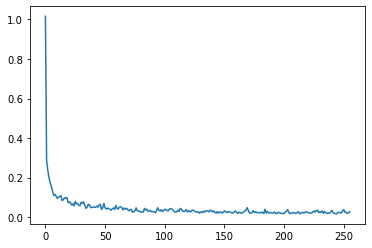

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)